We are going to briefly talk about storing functions in Python. Functions are a way of saving lines of commands in one clean block of code. The function essentially works as a forumla that requires the input of data to receive an output. The input data that we use are called a parameters.

Let's set up some functions for calculating RPKM and TPM:

### Calculating RPKM (FPKM) ###

Some of you have heard the term RPKM before when referring to RNA-seq data. But what does this actually mean? This, in long-hand, is referring to **R**eads **p**er **k**ilobase **m**illion (RPKM). This is referring to, per gene, the number of reads that map per million reads, per kilobase of the gene. This will allow you to scale for both depth of an RNA-seq library, as well as for length of the gene itself. **F**ragments **p**er **k**ilobase **m**illion (FPMK) is a more general term to include both single and paired end reads.

Let's begin by calculating RPM, or reads per million. We can do this by first generating our scaling factor, which we can calculate by summing the total reads in a library and then dividing by one million:

In [3]:
import pandas as pd

In [10]:
counts_clean = pd.read_csv("/home/ucsd-train40/projects/mouse_LPS/featurecounts/Mouse_LPS_clean_counts_with_length.csv", 
                           index_col=0)
counts_clean.head()

,Length,mouse_0hr_rep1,mouse_0hr_rep2,mouse_4hr_rep1,mouse_4hr_rep2
Geneid,,,,,
ENSMUSG00000103922.1,1069,3,7,5,8
ENSMUSG00000033845.13,8487,292,546,135,175
ENSMUSG00000025903.14,7145,423,525,285,365
ENSMUSG00000033813.15,3017,577,561,564,483
ENSMUSG00000103280.1,1111,20,3,0,6


In [11]:
data_col = counts_clean.columns[1:]

In [12]:
Mouse_scale = counts_clean[data_col].sum(axis=0) / 10**6

We can then take each of our genes and divide by our scaling factor to generate our RPM value:

In [13]:
RPM = counts_clean[data_col].divide(Mouse_scale,axis="columns")
RPM.head()

,mouse_0hr_rep1,mouse_0hr_rep2,mouse_4hr_rep1,mouse_4hr_rep2
Geneid,,,,
ENSMUSG00000103922.1,0.265273,0.458142,0.409065,0.714572
ENSMUSG00000033845.13,25.819874,35.735068,11.044742,15.631261
ENSMUSG00000025903.14,37.403447,34.360642,23.316677,32.602344
ENSMUSG00000033813.15,51.020778,36.716801,46.142477,43.142280
ENSMUSG00000103280.1,1.768485,0.196347,0.000000,0.535929


Lastly, we will divide the RPM:

In [14]:
RPKM = RPM.divide((counts_clean['Length'] / 1000), axis = 0)
RPKM.head()

,mouse_0hr_rep1,mouse_0hr_rep2,mouse_4hr_rep1,mouse_4hr_rep2
Geneid,,,,
ENSMUSG00000103922.1,0.248150,0.428571,0.382661,0.668449
ENSMUSG00000033845.13,3.042285,4.210565,1.301372,1.841789
ENSMUSG00000025903.14,5.234912,4.809047,3.263356,4.562959
ENSMUSG00000033813.15,16.911096,12.169970,15.294159,14.299728
ENSMUSG00000103280.1,1.591795,0.176730,0.000000,0.482384


We can also write this up in a function to save what we've done in a clean block of code:

In [15]:
def counts_to_RPKM(counts_matrix):
    data_col = counts_matrix.columns[1:]
    scale = counts_matrix[data_col].sum(axis=0) / 10**6
    rpm = counts_matrix[data_col].divide(scale,axis="columns")
    rpkm = rpm.divide((counts_matrix['Length'] / 1000), axis = 0)
    return rpkm

We can now pass our data through this function, in this case out counts_clean matrix:

In [16]:
rpkm = counts_to_RPKM(counts_clean)
rpkm.head()

,mouse_0hr_rep1,mouse_0hr_rep2,mouse_4hr_rep1,mouse_4hr_rep2
Geneid,,,,
ENSMUSG00000103922.1,0.248150,0.428571,0.382661,0.668449
ENSMUSG00000033845.13,3.042285,4.210565,1.301372,1.841789
ENSMUSG00000025903.14,5.234912,4.809047,3.263356,4.562959
ENSMUSG00000033813.15,16.911096,12.169970,15.294159,14.299728
ENSMUSG00000103280.1,1.591795,0.176730,0.000000,0.482384


### Let's do the same for Transcripts Per Million (TPM) ###

We can also make another function for transcript per million (TPM), which scales the data for both gene length and sequencing depth, but first normalized to gene length before normalizing for depth: 

Each measurement is represented as 'parts of a whole' compared to the entire library, and thus library sizes are equalized across samples.

In [17]:
def counts_to_tpm(counts_matrix):
    data_col = counts_matrix.columns[1:]
    rpk = counts_matrix[data_col].divide((counts_matrix['Length'] / 1000), axis=0)
    sums_per_million = rpk.sum(axis = 0) / 10 ** 6
    tpm = rpk.divide(sums_per_million)
    return tpm

In [18]:
tpm = counts_to_tpm(counts_clean)
tpm.head()

,mouse_0hr_rep1,mouse_0hr_rep2,mouse_4hr_rep1,mouse_4hr_rep2
Geneid,,,,
ENSMUSG00000103922.1,0.789101,1.043076,1.080166,1.685882
ENSMUSG00000033845.13,9.674258,10.247881,3.673479,4.645139
ENSMUSG00000025903.14,16.646662,11.704496,9.211718,11.508150
ENSMUSG00000033813.15,53.776128,29.619874,43.171966,36.065064
ENSMUSG00000103280.1,5.061800,0.430133,0.000000,1.216612


You'll notice that the values between the two tabes look a little different. These differences can be most apparent by summing the values in each of the columns:

In [19]:
rpkm.sum(axis = 0) # Sums for RPKM

mouse_0hr_rep1    314472.186766
mouse_0hr_rep2    410871.785674
mouse_4hr_rep1    354261.345739
mouse_4hr_rep2    396498.067497
dtype: float64

In [20]:
tpm.sum(axis = 0) # Sums for TPM

mouse_0hr_rep1    1000000.0
mouse_0hr_rep2    1000000.0
mouse_4hr_rep1    1000000.0
mouse_4hr_rep2    1000000.0
dtype: float64

This is why TPM is slightly preferably to RPKM: the denominator is the same between libraries. This means that a TPM value is less arbitrary a value when compared to RPKM.

### Plotting some TPM read results ###

In [27]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

Let's also take a look at our reads distribution:

(array([  1.60570000e+04,   5.00000000e+00,   8.00000000e+00,
          6.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([     0.        ,   3680.53717042,   7361.07434083,  11041.61151125,
         14722.14868167,  18402.68585208,  22083.2230225 ,  25763.76019291,
         29444.29736333,  33124.83453375,  36805.37170416]),
 <a list of 10 Patch objects>)

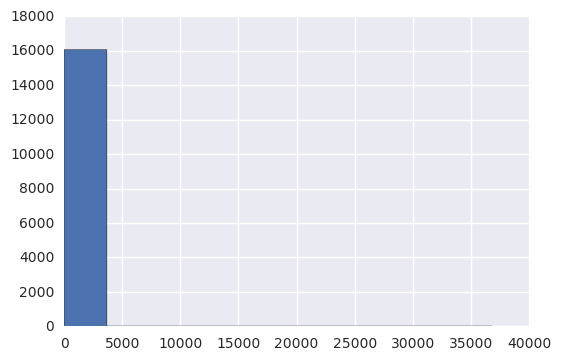

In [28]:
plt.hist(tpm['mouse_0hr_rep1'])

This is not very informative given the scale. Let's see if we can get this represented more intuitively by log transforming our data before plotting. Notice that we need to add a +1 value to deal with negative values. We call this a pseudocount:

(array([ 2316.,  3646.,  4211.,  3612.,  1636.,   495.,   118.,    25.,
           15.,     8.]),
 array([  0.        ,   1.51676679,   3.03353358,   4.55030038,
          6.06706717,   7.58383396,   9.10060075,  10.61736754,
         12.13413433,  13.65090113,  15.16766792]),
 <a list of 10 Patch objects>)

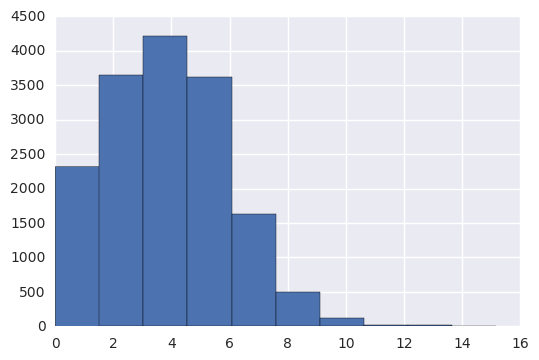

In [29]:
plt.hist(np.log2(tpm['mouse_0hr_rep1'] + 1), bins = 10)

We can also change the size of our bins to have a more discrete view of our counts distribution:

(array([ 195.,  141.,  195.,  172.,  214.,  246.,  279.,  274.,  288.,
         312.,  322.,  357.,  324.,  357.,  371.,  362.,  352.,  386.,
         415.,  400.,  384.,  402.,  409.,  418.,  434.,  478.,  422.,
         423.,  414.,  427.,  409.,  391.,  414.,  393.,  382.,  355.,
         319.,  342.,  334.,  273.,  285.,  205.,  202.,  185.,  173.,
         146.,  117.,  128.,  100.,   95.,   94.,   68.,   54.,   59.,
          52.,   49.,   38.,   29.,   27.,   25.,   18.,   13.,   18.,
          21.,   14.,    6.,   10.,    6.,    7.,    5.,    7.,    3.,
           4.,    1.,    2.,    2.,    1.,    3.,    0.,    2.,    1.,
           0.,    0.,    1.,    2.,    6.,    0.,    1.,    2.,    2.,
           2.,    1.,    1.,    0.,    1.,    0.,    1.,    1.,    0.,    1.]),
 array([  0.        ,   0.15167668,   0.30335336,   0.45503004,
          0.60670672,   0.7583834 ,   0.91006008,   1.06173675,
          1.21341343,   1.36509011,   1.51676679,   1.66844347,
          1.820120

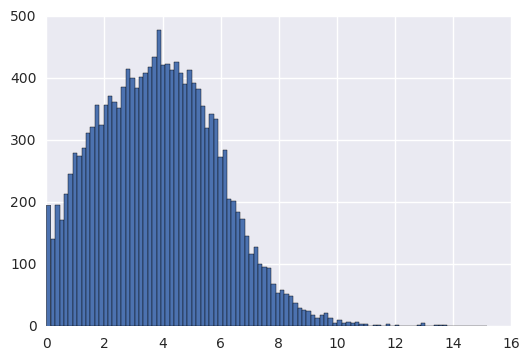

In [30]:
plt.hist(np.log2(tpm['mouse_0hr_rep1'] + 1), bins = 100)

Let's plot pairwise comparisons of our libraries on scatterplots using lmplots in seaborn:

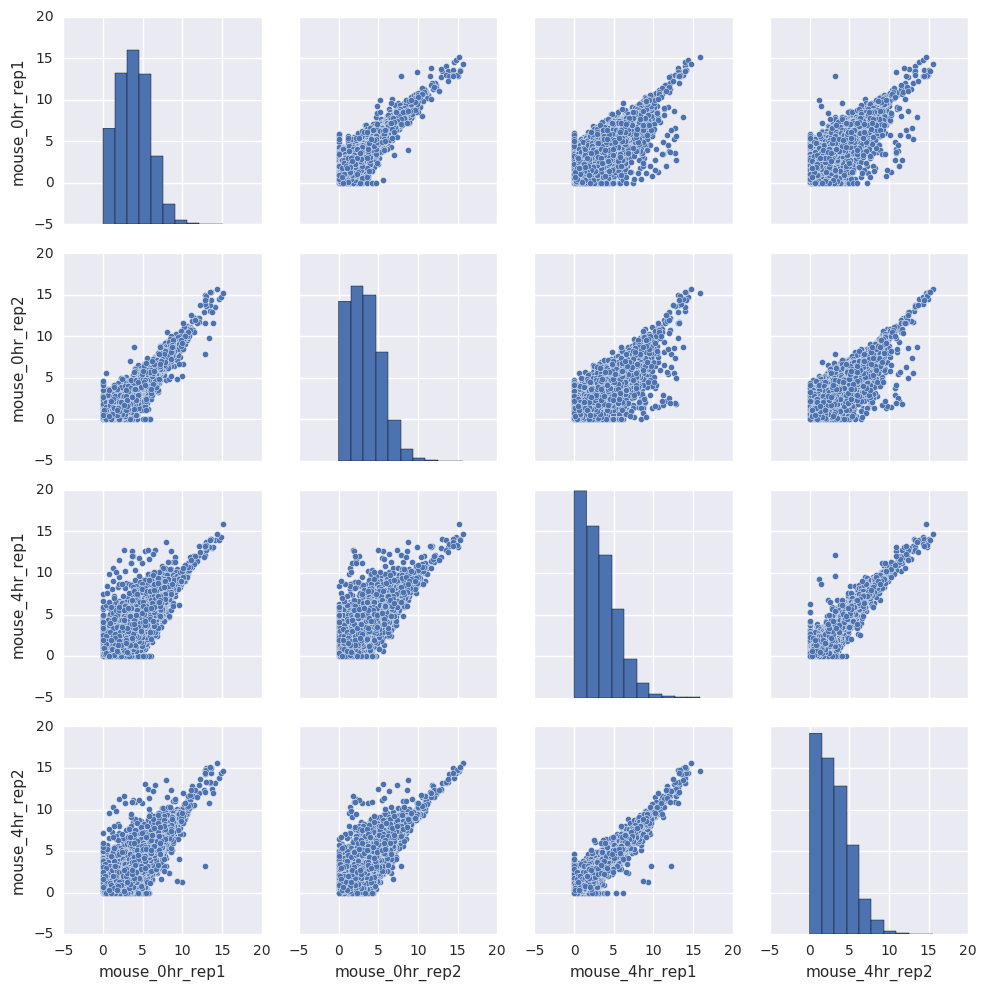

In [32]:
sns.pairplot(np.log2(tpm+1))

We can also look at specific samples and see how they compare to one another on a pairplot. Let's look between replicates:

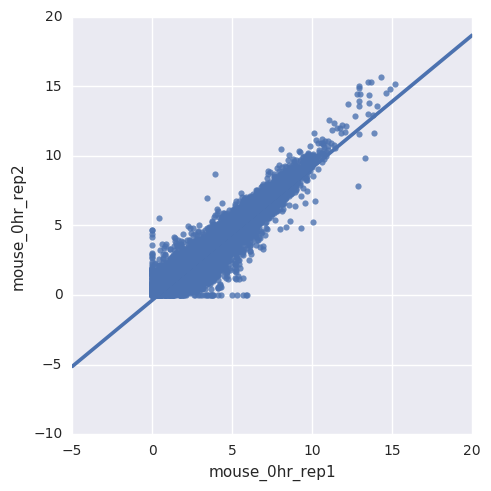

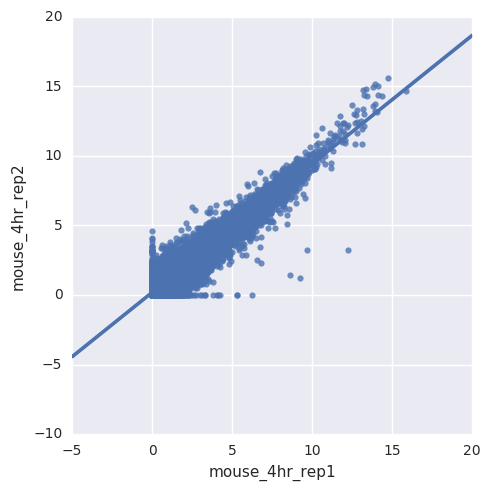

In [39]:
sns.lmplot('mouse_0hr_rep1','mouse_0hr_rep2',log2_tpm)
sns.lmplot('mouse_4hr_rep1','mouse_4hr_rep2',log2_tpm)

Great! But how do these comare between experimental samples? Let's take a look:

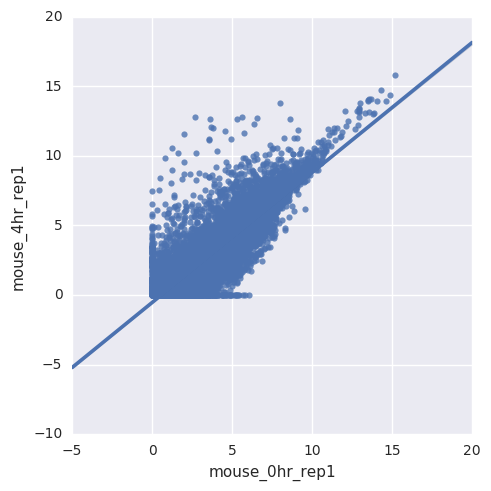

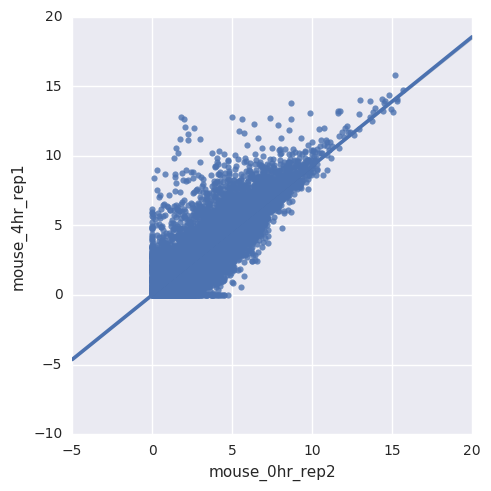

In [41]:
sns.lmplot('mouse_0hr_rep1','mouse_4hr_rep1',log2_tpm)
sns.lmplot('mouse_0hr_rep2','mouse_4hr_rep1',log2_tpm)

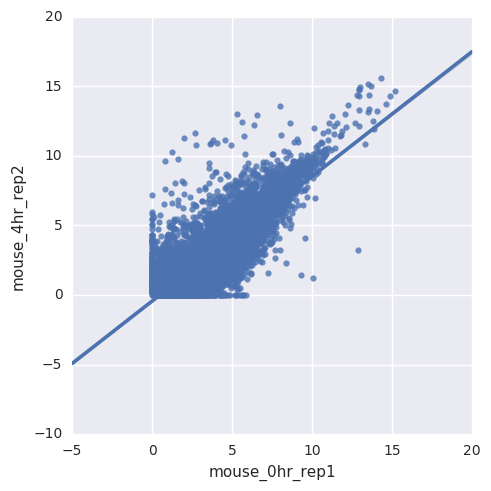

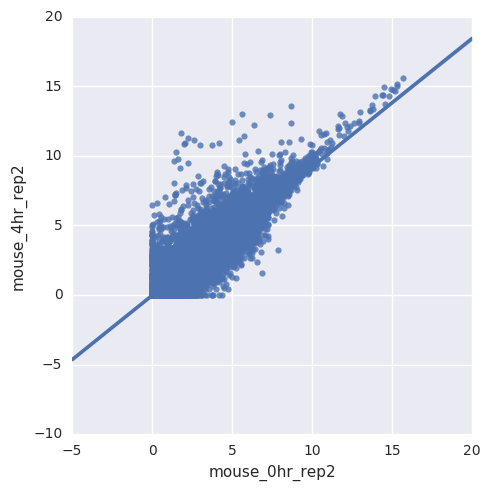

In [42]:
sns.lmplot('mouse_0hr_rep1','mouse_4hr_rep2',log2_tpm)
sns.lmplot('mouse_0hr_rep2','mouse_4hr_rep2',log2_tpm)

To calculate correlation between samples. This will look similar to the clusteplots that we generated in lab:

In [35]:
log2_tpm = np.log2(tpm+1)
log2_tpm.corr()

,mouse_0hr_rep1,mouse_0hr_rep2,mouse_4hr_rep1,mouse_4hr_rep2
mouse_0hr_rep1,1.000000,0.945724,0.862081,0.860454
mouse_0hr_rep2,0.945724,1.000000,0.862218,0.892849
mouse_4hr_rep1,0.862081,0.862218,1.000000,0.961085
mouse_4hr_rep2,0.860454,0.892849,0.961085,1.000000
